# Autoencoder Simple

## Cargamos librerías keras/tensorflow

In [12]:
# Importamos la librería keras
import keras
from keras import layers


## Construimos el modelo

In [13]:

# Definimos la dimension intermedia, pasamos de 784 de entrada a 32 en el espacio latente
encoding_dim = 32  # 32 floats 

# Creamos el Input de la red neuronal (lo tratamos como datos no como imagen)
input_img = keras.Input(shape=(784,))

# "encoded" aplicamos la capa densamente conectada con 32 neuronas
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# "decoded" aplicamos la capa densamente conectada de salida con 784 neuronas (como la entrada)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# Construimos el modelo (con Functional API)
autoencoder = keras.Model(input_img, decoded)

# Definimos el optimizador y la función de pérdida
# Optimizador - adam
# Función pérdida - binary_crossentropy
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=["mse"])

## Cargamos los datos de las imágenes

In [14]:
# Vamos a preparar los datos importando el dataset mnist desde el propio keras
from keras.datasets import mnist
# También cargamos la librería numpy 
import numpy as np

# Cargamos los datos separando en train y test
# No necesitamos las etiquetas ya que no las vamos a usar
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizamos los datos para dejarlos entre 0 y 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# Damos forma a los datos en formato imagen
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


## Entrenamos el modelo

In [15]:
# Entrenamos el autoencoder
# 5 epocs
# 256 tamaño del batch
# Validación la hace con los datos de test
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3870 - mse: 0.1086 - val_loss: 0.1878 - val_mse: 0.0404
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1789 - mse: 0.0373 - val_loss: 0.1534 - val_mse: 0.0291
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1494 - mse: 0.0276 - val_loss: 0.1343 - val_mse: 0.0229
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1327 - mse: 0.0222 - val_loss: 0.1219 - val_mse: 0.0189
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1216 - mse: 0.0186 - val_loss: 0.1137 - val_mse: 0.0163


## Predecimos el resultado

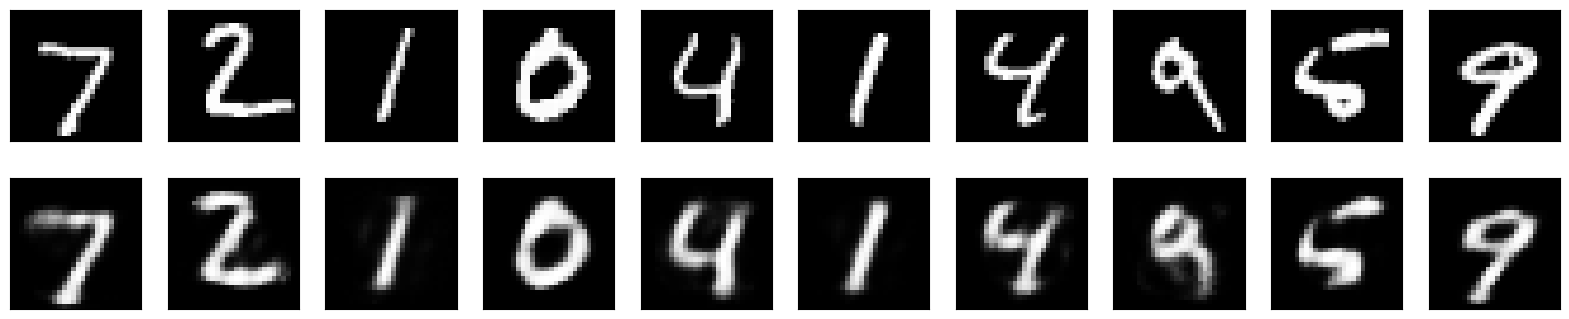

In [16]:
# Una vez entrenado el autoencoder vamos a "predecir" los datos de test
# con autoencoder
decoded_imgs = autoencoder.predict(x_test,verbose=0)


# Cargamos la librería de Matplotlib para poder pintar
import matplotlib.pyplot as plt

# Vamos a mostrar 10 imágenes de test a ver cómo se han reconstruido
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



# Autoencoder Profundo

## Cargamos las librerías de Keras/Tensorflow

In [17]:
# Importamos la librería keras
import keras
from keras import layers

## Creamos el modelo

In [18]:
# Definimos la dimension intermedia, pasamos de 784 de entrada a 32 en el espacio latente
encoding_dim = 32  # 32 floats 

# Creamos el Input de la red neuronal (lo tratamos como datos no como imagen)
input_img = keras.Input(shape=(784,))

# "encoded" aplicamos 3 capas densamente conectadas hasta llegar a las 32 neuronas
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

# "decoded" aplicamos las 3 capa densamente conectadas con la de salida con 784 neuronas (como la entrada)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# Construimos el modelo (con Functional API)
autoencoder = keras.Model(input_img, decoded)


# Definimos el optimizador y la función de pérdida
# Optimizador - adam
# Función pérdida - binary_crossentropy
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

## Cargamos los datos de las imágenes

In [19]:
# Vamos a preparar los datos importando el dataset mnist desde el propio keras
from keras.datasets import mnist
# También cargamos la librería numpy 
import numpy as np

# Cargamos los datos separando en train y test
# No necesitamos las etiquetas ya que no las vamos a usar
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizamos los datos para dejarlos entre 0 y 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


## Entrenamos el Modelo

In [20]:
# Entrenamos el autoencoder
# 5 epocs
# 256 tamaño del batch
# Validación la hace con los datos de test
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3367 - val_loss: 0.1603
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1529 - val_loss: 0.1321
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1300 - val_loss: 0.1199
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1203 - val_loss: 0.1140
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1142 - val_loss: 0.1099


## Predecimos el resultado

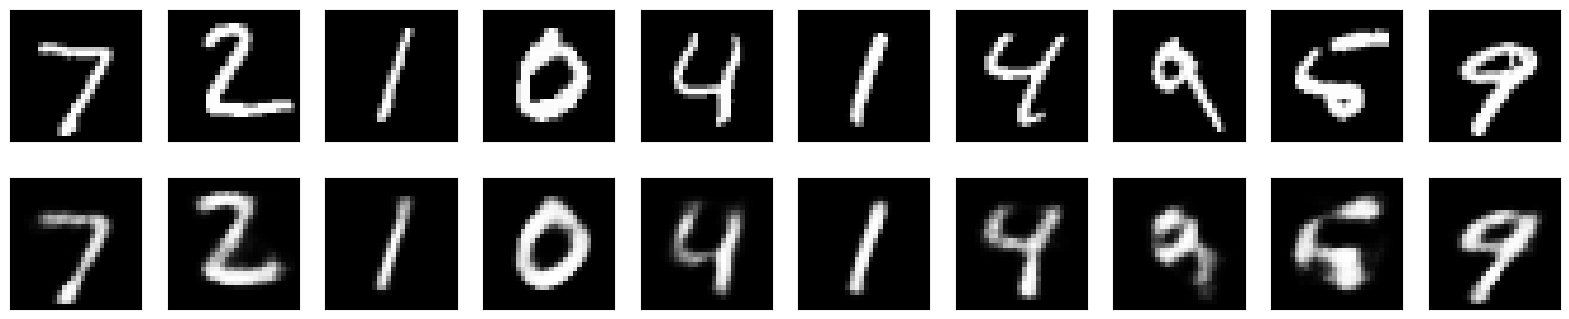

In [22]:
# Una vez entrenado el autoencoder vamos a "predecir" los datos de test
# con autoencoder
decoded_imgs = autoencoder.predict(x_test,verbose=0)


# Cargamos la librería de Matplotlib para poder pintar
import matplotlib.pyplot as plt

# Vamos a mostrar 10 imágenes de test a ver cómo se han reconstruido
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



# Autoencoder Convolucional

## Cargamos las librerías de Keras/Tensorflow

In [23]:
# Importamos la librería keras
import keras
from keras import layers

## Construimos el modelo

In [24]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_6 (UpSampling2D)       │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_7 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_8 (UpSampling2D)       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

## Cargamos los datos

In [25]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

## Entrenamos el modelo

In [26]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.3173 - val_loss: 0.1402
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1356 - val_loss: 0.1233
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1220 - val_loss: 0.1157
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1156 - val_loss: 0.1112
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1119 - val_loss: 0.1082


## Predecimos el resultado

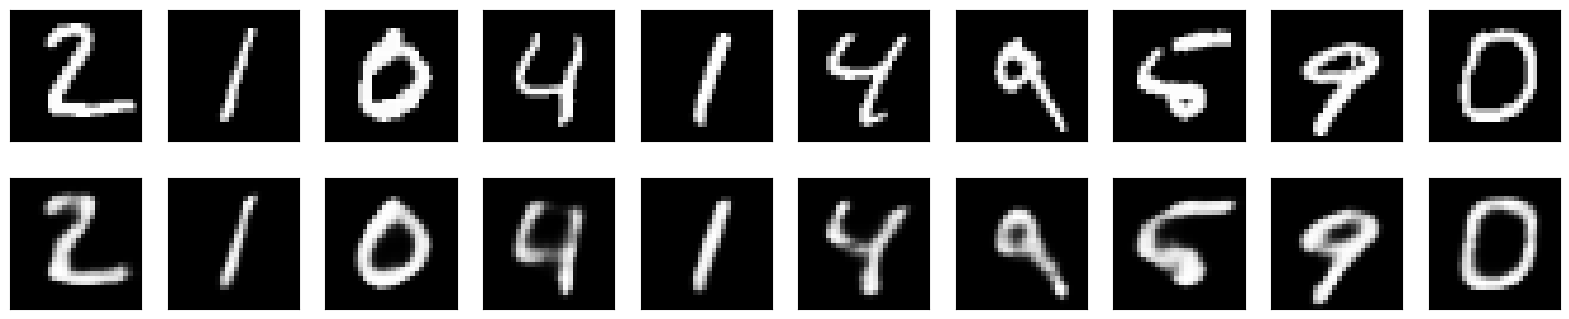

In [27]:
decoded_imgs = autoencoder.predict(x_test,verbose=0)

# Cargamos la librería de Matplotlib para poder pintar
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Autoencoder Denoising

## Cargamos librerías Keras/Tensorflow

In [28]:
import keras
from keras import layers

## Consturimos el modelo

In [29]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()



Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_9 (UpSampling2D)       │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_10 (UpSampling2D)      │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_11 (UpSampling2D)      │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

## Cargamos los datos de las imágenes

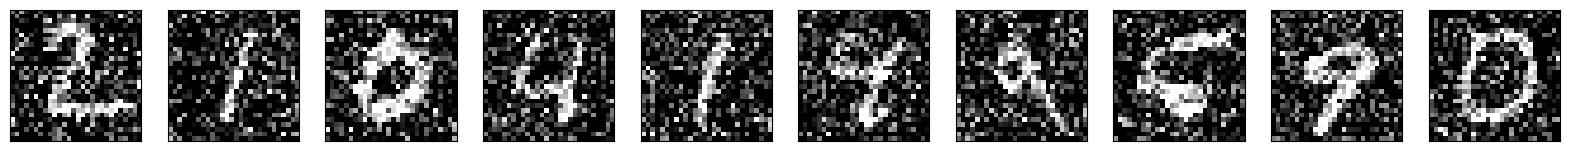

In [30]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# vamos a generar ruido en las imágenes
# metemos de forma aleatoria valores de una distribución normal añadiendo ese valor
# al que ya existe
# el noise_factor nos da la fuerza osbre la imagen real (más pequeño implica menos impacto)
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

# Recortamos para que no se salga del rango 0,1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


# Cargamos la librería de Matplotlib para poder pintar
import matplotlib.pyplot as plt

# Mostramos las imagenes con ruido
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Entrenamos el modelo

In [31]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.3101 - val_loss: 0.1787
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1715 - val_loss: 0.1557
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1517 - val_loss: 0.1434
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1422 - val_loss: 0.1367
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1372 - val_loss: 0.1327


## Predecimos el resultado

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


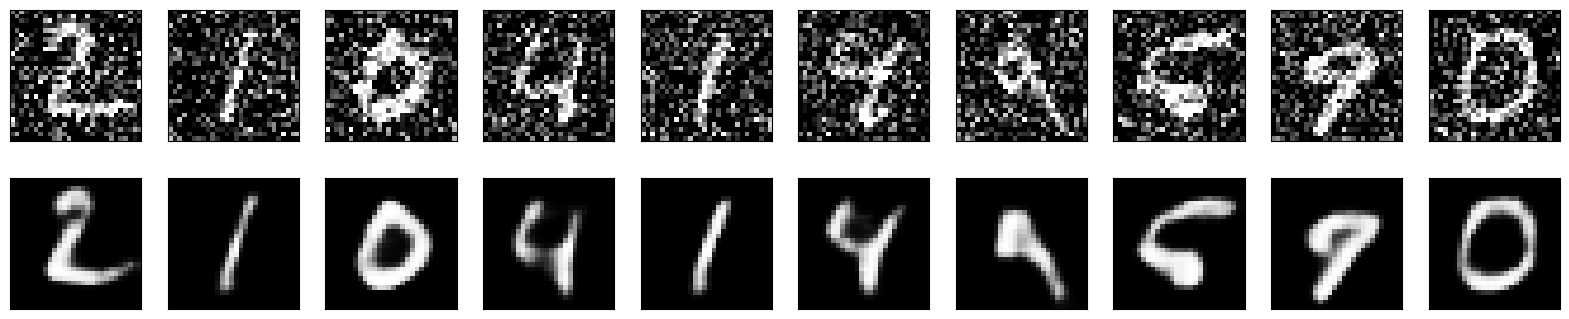

In [32]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#----------------------------------------------